In [29]:
import pandas
pandas.set_option("display.max_rows", 50, "display.max_columns", 50)

import numpy
import pygsheets
import scipy.stats
import datetime

import matplotlib.pyplot as mp
import matplotlib

import geopandas
import cartopy
import shapely

In [42]:
# import the proper table
gc = pygsheets.authorize(service_account_env_var='GDRIVE_API_CREDENTIALS')
spreadsheet = gc.open_by_key('12tg0g30yDCBSLMMeuWu-ThFuIJOF_f_ezjB1Nxc3xO4')
#spreadsheet = gc.open_by_key('12tg0g30yDCBSLMMeuWu-ThFuIJOF_f_ezjB1Nxc3xO4') # feb 11 2022 version for EGT

fig1_data_df = spreadsheet.worksheet('title', 'Figure 1 (data for plot)').get_as_df()
fig2_data_df = spreadsheet.worksheet('title', 'Figure 2 (data for plot)').get_as_df()
fig3_data_df = spreadsheet.worksheet('title', 'Figure ES1/3 (data for plot)').get_as_df()

fig1_data_df.replace('',0,inplace=True)
fig2_data_df.replace('',numpy.nan,inplace=True)
fig3_data_df.replace('',numpy.nan,inplace=True)

# colors

In [44]:
cmap_to_sample = matplotlib.cm.get_cmap('YlOrBr_r')
plot_yellow = cmap_to_sample(0.6)
plot_orange = cmap_to_sample(0.35)
plot_red = cmap_to_sample(0.1)

cmap_to_sample = matplotlib.cm.get_cmap('viridis')
plot_dkpurple = cmap_to_sample(0)
plot_purple = cmap_to_sample(0.25)
plot_blue = cmap_to_sample(0.5)
plot_green = cmap_to_sample(0.75)

solar_yellow    = '#b58900'
solar_orange    = '#cb4b16'

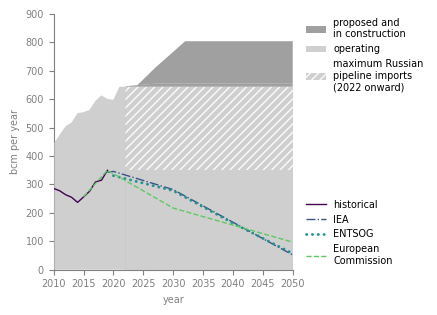

In [45]:
cmap_to_sample = matplotlib.cm.get_cmap('viridis')
plot_dkpurple = cmap_to_sample(0)
plot_purple = cmap_to_sample(0.25)
plot_blue = cmap_to_sample(0.5)
plot_green = cmap_to_sample(0.75)

cmap_to_sample = matplotlib.cm.get_cmap('YlOrBr_r')
plot_russia = '0.99'#cmap_to_sample(0.25)
plot_yellow = '0.75'#cmap_to_sample(0.7)
#plot_orange = cmap_to_sample(0.35)
plot_red = '0.5'#cmap_to_sample(0.1)

font_size = 7
shade_alpha = 0.75
lw_all = 1
axis_color='0.5'

existing_capacity = 598 #655
total_russia_imports = 247.0977
capacity_without_russia = existing_capacity-total_russia_imports

mp.rcParams['hatch.color'] = plot_russia
mp.rcParams['hatch.linewidth'] = 1

fig = mp.figure(figsize=(3.25,3.25))

ax = fig.add_subplot(111)

f1=ax.fill_between(fig3_data_df.Year[:13],fig3_data_df['existing capacity'][:13], 
                fc=plot_yellow, ec='None', alpha=shade_alpha, zorder=6)#,
                #label='existing')

f1pt5=ax.fill_between(fig3_data_df.Year[12:],[capacity_without_russia]*fig3_data_df.Year[12:].size, 
                fc=plot_yellow, ec='None', alpha=shade_alpha, zorder=6)#,
                #label='existing')

f2=ax.fill_between(fig3_data_df.Year[12:],fig3_data_df['existing capacity'][12:],
                fig3_data_df['capacity under construction'][12:],
                fc=plot_red, ec='None', alpha=shade_alpha, zorder=5)#,
                #label='construction')

f3=ax.fill_between(fig3_data_df.Year[12:],fig3_data_df['capacity under construction'][12:],
                fig3_data_df['proposed capacity'][12:],
                fc=plot_red, ec='None', alpha=shade_alpha)#,
                #label='proposed')

# ****************************************

# f4=ax.fill_between(fig3_data_df.Year[12:],
#                 [capacity_without_russia]*fig3_data_df.Year[12:].size,
#                 fig3_data_df['existing capacity'][12:],
#                 fc='None', ec='0.1', alpha=0.25, hatch='.....', zorder=3, linewidth=0.25)#,
#                 #label='maximum Russian import volume')

# f4=ax.fill_between(fig3_data_df.Year[12:],
#                 [capacity_without_russia]*fig3_data_df.Year[12:].size,
#                 fig3_data_df['existing capacity'][12:],
#                 fc=plot_russia, ec=plot_russia, linestyle='--', alpha=shade_alpha, zorder=7)#,

f4=ax.fill_between(fig3_data_df.Year[12:],
                [capacity_without_russia]*fig3_data_df.Year[12:].size,
                fig3_data_df['existing capacity'][12:],
                facecolor=plot_yellow, alpha=shade_alpha, hatch='////', zorder=3)#, linewidth=0)

# ****************************************

l1,=ax.plot(fig3_data_df[~fig3_data_df['historical'].isnull()]['Year'], 
        fig3_data_df[~fig3_data_df['historical'].isnull()]['historical'],
        c=plot_dkpurple, zorder=14, lw=lw_all)#, label='historical')

l2,=ax.plot(fig3_data_df[~fig3_data_df['IEA (2020) Sustainable Development scenario'].isnull()]['Year'], 
        fig3_data_df[~fig3_data_df['IEA (2020) Sustainable Development scenario'].isnull()]['IEA (2020) Sustainable Development scenario'],
        c=plot_purple, zorder=15, lw=lw_all, ls='-.')#, label='IEA')

l3,=ax.plot(fig3_data_df[~fig3_data_df['ENTSOG (2021)'].isnull()]['Year'], 
        fig3_data_df[~fig3_data_df['ENTSOG (2021)'].isnull()]['ENTSOG (2021)'],
        c=plot_blue, zorder=16, lw=lw_all*2,# label='ENTSOG'
        linestyle=(0,(0.1,2)),
        dash_capstyle='round')

l4,=ax.plot(fig3_data_df[~fig3_data_df['European Commission'].isnull()]['Year'], 
        fig3_data_df[~fig3_data_df['European Commission'].isnull()]['European Commission'],
        c=plot_green, zorder=17, lw=lw_all,# label='European\nCommission',
        ls='--')

ax.set_xlim(2010,2050)
ax.set_ylim(0,900)
ax.tick_params(labelsize=font_size)

ax.set_ylabel('bcm per year', fontsize=font_size, color=axis_color)
ax.set_xlabel('year', fontsize=font_size, color=axis_color)

fig.tight_layout()

legend_lines = ax.legend([l1,l2,l3,l4], 
                         ['historical','IEA','ENTSOG','European\nCommission'],
                         fontsize=font_size, frameon=False, 
                         bbox_to_anchor=(1.04,0), loc='lower left',
                         labelspacing=0.5, borderaxespad=0)

legend_fill = ax.legend([f3,f1,f4], 
                         ['proposed and\nin construction','operating','maximum Russian\npipeline imports\n(2022 onward)'],
                         fontsize=font_size, frameon=False, 
                         bbox_to_anchor=(1.04,1), loc='upper left',
                         labelspacing=0.5, borderaxespad=0, ncol=1)

ax.add_artist(legend_lines)
# ax.text(s='proposed capacity', x=2049.25, y=850, 
#         fontsize=font_size, ha='right', va='top',
#        c=plot_red, style='italic')
# ax.text(s='capacity under construction', x=2049.25, y=700, 
#         fontsize=font_size, ha='right', va='top',
#        c=plot_orange, style='italic')
# ax.text(s='existing capacity', x=2049.25, y=630, 
#         fontsize=font_size, ha='right', va='top',
#        c=plot_yellow, style='italic')

ax.spines['bottom'].set_color(axis_color)
ax.spines['left'].set_color(axis_color)
ax.tick_params(colors=axis_color)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
#ax.tick_labels(color='0.25')
#ax.spines['top'].set_color(axis_color) 
#ax.spines['right'].set_color(axis_color)

fig.savefig('Euro-Gas-Report-figure3-with-Russian-imports-alt7.pdf', bbox_inches='tight', transparent=True)
fig.savefig('Euro-Gas-Report-figure3-with-Russian-imports-alt7.png', bbox_inches='tight', dpi=600)

## alt reversed order/grouping

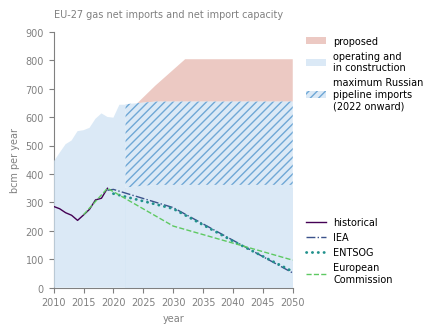

In [46]:
cmap_to_sample = matplotlib.cm.get_cmap('viridis')
plot_dkpurple = cmap_to_sample(0)
plot_purple = cmap_to_sample(0.25)
plot_blue = cmap_to_sample(0.5)
plot_green = cmap_to_sample(0.75)

cmap_to_sample = matplotlib.cm.get_cmap('YlOrBr_r')
#plot_russia = '#3d85c6'#cmap_to_sample(0.25)
plot_russia = '#6fa8d6'
plot_yellow = '#cfe2f3'#cmap_to_sample(0.7)
#plot_orange = cmap_to_sample(0.35)
plot_red = '#e6b8af'#cmap_to_sample(0.1)

font_size = 7
shade_alpha = 0.75
lw_all = 1
axis_color='0.5'

fig = mp.figure(figsize=(3.25,3.25))

ax = fig.add_subplot(111)

f1=ax.fill_between(fig3_data_df.Year[:13],fig3_data_df['existing_capacity_actual'][:13], 
                fc=plot_yellow, ec='None', alpha=shade_alpha, zorder=6)#,
                #label='existing')

f1pt5=ax.fill_between(fig3_data_df.Year[12:],
                      [capacity_without_russia]*fig3_data_df.Year[12:].size, 
                fc=plot_yellow, ec='None', alpha=shade_alpha, zorder=6)#,
                #label='existing')

f2=ax.fill_between(fig3_data_df.Year[12:],[capacity_without_russia]*fig3_data_df.Year[12:].size,
                fig3_data_df['capacity_under_construction_actual'][12:]+[capacity_without_russia]*fig3_data_df.Year[12:].size,
                fc=plot_yellow, ec='None', alpha=shade_alpha, zorder=5)#,
                #label='construction')

f3=ax.fill_between(fig3_data_df.Year[12:],
                   fig3_data_df['capacity_under_construction_actual'][12:]+fig3_data_df['existing_capacity_actual'][12:],
                fig3_data_df['proposed_capacity_actual'][12:]+fig3_data_df['capacity_under_construction_actual'][12:]+fig3_data_df['existing_capacity_actual'][12:],
                fc=plot_red, ec='None', alpha=shade_alpha)#,
                #label='proposed')

# ****************************************

existing_capacity = 598 #655
total_russia_imports = 247.0977
capacity_without_russia = existing_capacity-total_russia_imports

mp.rcParams['hatch.color'] = plot_russia
mp.rcParams['hatch.linewidth'] = 1

# f4=ax.fill_between(fig3_data_df.Year[12:],
#                 [capacity_without_russia]*fig3_data_df.Year[12:].size,
#                 fig3_data_df['existing capacity'][12:],
#                 fc='None', ec='0.1', alpha=0.25, hatch='.....', zorder=3, linewidth=0.25)#,
#                 #label='maximum Russian import volume')

# f4=ax.fill_between(fig3_data_df.Year[12:],
#                 [capacity_without_russia]*fig3_data_df.Year[12:].size,
#                 fig3_data_df['existing capacity'][12:],
#                 fc=plot_russia, ec=plot_russia, linestyle='--', alpha=shade_alpha, zorder=7)#,

f4=ax.fill_between(fig3_data_df.Year[12:],
                   [capacity_without_russia]*fig3_data_df.Year[12:].size+fig3_data_df['capacity_under_construction_actual'][12:],
                fig3_data_df['existing_capacity_actual'][12:]+fig3_data_df['capacity_under_construction_actual'][12:],
                facecolor=plot_yellow, alpha=shade_alpha, hatch='////', zorder=3)#, linewidth=0)

# ****************************************

l1,=ax.plot(fig3_data_df[~fig3_data_df['historical'].isnull()]['Year'], 
        fig3_data_df[~fig3_data_df['historical'].isnull()]['historical'],
        c=plot_dkpurple, zorder=14, lw=lw_all)#, label='historical')

l2,=ax.plot(fig3_data_df[~fig3_data_df['IEA (2020) Sustainable Development scenario'].isnull()]['Year'], 
        fig3_data_df[~fig3_data_df['IEA (2020) Sustainable Development scenario'].isnull()]['IEA (2020) Sustainable Development scenario'],
        c=plot_purple, zorder=15, lw=lw_all, ls='-.')#, label='IEA')

l3,=ax.plot(fig3_data_df[~fig3_data_df['ENTSOG (2021)'].isnull()]['Year'], 
        fig3_data_df[~fig3_data_df['ENTSOG (2021)'].isnull()]['ENTSOG (2021)'],
        c=plot_blue, zorder=16, lw=lw_all*2,# label='ENTSOG'
        linestyle=(0,(0.1,2)),
        dash_capstyle='round')

l4,=ax.plot(fig3_data_df[~fig3_data_df['European Commission'].isnull()]['Year'], 
        fig3_data_df[~fig3_data_df['European Commission'].isnull()]['European Commission'],
        c=plot_green, zorder=17, lw=lw_all,# label='European\nCommission',
        ls='--')

ax.set_xlim(2010,2050)
ax.set_ylim(0,900)
ax.tick_params(labelsize=font_size)

ax.set_ylabel('bcm per year', fontsize=font_size, color=axis_color)
ax.set_xlabel('year', fontsize=font_size, color=axis_color)

fig.tight_layout()

legend_lines = ax.legend([l1,l2,l3,l4], 
                         ['historical','IEA','ENTSOG','European\nCommission'],
                         fontsize=font_size, frameon=False, 
                         bbox_to_anchor=(1.04,0), loc='lower left',
                         labelspacing=0.5, borderaxespad=0)

legend_fill = ax.legend([f3,f1,f4], 
                         ['proposed','operating and\nin construction','maximum Russian\npipeline imports\n(2022 onward)'],
                         fontsize=font_size, frameon=False, 
                         bbox_to_anchor=(1.04,1), loc='upper left',
                         labelspacing=0.5, borderaxespad=0, ncol=1)

ax.add_artist(legend_lines)

ax.spines['bottom'].set_color(axis_color)
ax.spines['left'].set_color(axis_color)
ax.tick_params(colors=axis_color)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_zorder(0)

ax.text(s='EU-27 gas net imports and net import capacity',
        x=0, y=1.05, transform=ax.transAxes, fontsize=font_size, color=axis_color,
        ha='left', va='bottom')
#ax.tick_labels(color='0.25')
#ax.spines['top'].set_color(axis_color) 
#ax.spines['right'].set_color(axis_color)

fig.savefig('Euro-Gas-Report-figure3-with-Russian-imports-alt-final-with-title.pdf', bbox_inches='tight', transparent=True)
fig.savefig('Euro-Gas-Report-figure3-with-Russian-imports-alt-final-with-title.png', bbox_inches='tight', dpi=600)

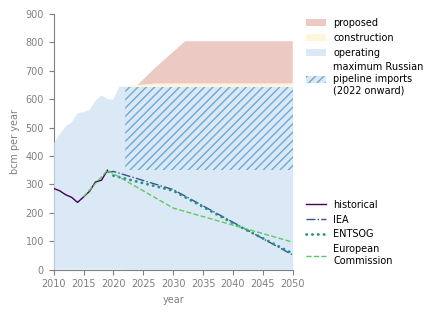

In [47]:
cmap_to_sample = matplotlib.cm.get_cmap('viridis')
plot_dkpurple = cmap_to_sample(0)
plot_purple = cmap_to_sample(0.25)
plot_blue = cmap_to_sample(0.5)
plot_green = cmap_to_sample(0.75)

cmap_to_sample = matplotlib.cm.get_cmap('YlOrBr_r')
#plot_russia = '#3d85c6'#cmap_to_sample(0.25)
plot_russia = '#6fa8d6'
plot_yellow = '#cfe2f3'#cmap_to_sample(0.7)
plot_orange = '#fff2cc'#cmap_to_sample(0.35)
plot_red = '#e6b8af'#cmap_to_sample(0.1)

font_size = 7
shade_alpha = 0.75
lw_all = 1
axis_color='0.5'

fig = mp.figure(figsize=(3.25,3.25))

ax = fig.add_subplot(111)

f1=ax.fill_between(fig3_data_df.Year[:13],fig3_data_df['existing capacity'][:13], 
                fc=plot_yellow, ec='None', alpha=shade_alpha, zorder=6)#,
                #label='existing')

f1pt5=ax.fill_between(fig3_data_df.Year[12:],[capacity_without_russia]*fig3_data_df.Year[12:].size, 
                fc=plot_yellow, ec='None', alpha=shade_alpha, zorder=6)#,
                #label='existing')

f2=ax.fill_between(fig3_data_df.Year[12:],fig3_data_df['existing capacity'][12:],
                fig3_data_df['capacity under construction'][12:],
                fc=plot_orange, ec='None', alpha=shade_alpha, zorder=5)#,
                #label='construction')

f3=ax.fill_between(fig3_data_df.Year[12:],fig3_data_df['capacity under construction'][12:],
                fig3_data_df['proposed capacity'][12:],
                fc=plot_red, ec='None', alpha=shade_alpha)#,
                #label='proposed')

# ****************************************

existing_capacity = 598 #655
total_russia_imports = 247.0977
capacity_without_russia = existing_capacity-total_russia_imports

mp.rcParams['hatch.color'] = plot_russia
mp.rcParams['hatch.linewidth'] = 1

# f4=ax.fill_between(fig3_data_df.Year[12:],
#                 [capacity_without_russia]*fig3_data_df.Year[12:].size,
#                 fig3_data_df['existing capacity'][12:],
#                 fc='None', ec='0.1', alpha=0.25, hatch='.....', zorder=3, linewidth=0.25)#,
#                 #label='maximum Russian import volume')

# f4=ax.fill_between(fig3_data_df.Year[12:],
#                 [capacity_without_russia]*fig3_data_df.Year[12:].size,
#                 fig3_data_df['existing capacity'][12:],
#                 fc=plot_russia, ec=plot_russia, linestyle='--', alpha=shade_alpha, zorder=7)#,

f4=ax.fill_between(fig3_data_df.Year[12:],
                [capacity_without_russia]*fig3_data_df.Year[12:].size,
                fig3_data_df['existing capacity'][12:],
                facecolor=plot_yellow, alpha=shade_alpha, hatch='////', zorder=3)#, linewidth=0)

# ****************************************

l1,=ax.plot(fig3_data_df[~fig3_data_df['historical'].isnull()]['Year'], 
        fig3_data_df[~fig3_data_df['historical'].isnull()]['historical'],
        c=plot_dkpurple, zorder=14, lw=lw_all)#, label='historical')

l2,=ax.plot(fig3_data_df[~fig3_data_df['IEA (2020) Sustainable Development scenario'].isnull()]['Year'], 
        fig3_data_df[~fig3_data_df['IEA (2020) Sustainable Development scenario'].isnull()]['IEA (2020) Sustainable Development scenario'],
        c=plot_purple, zorder=15, lw=lw_all, ls='-.')#, label='IEA')

l3,=ax.plot(fig3_data_df[~fig3_data_df['ENTSOG (2021)'].isnull()]['Year'], 
        fig3_data_df[~fig3_data_df['ENTSOG (2021)'].isnull()]['ENTSOG (2021)'],
        c=plot_blue, zorder=16, lw=lw_all*2,# label='ENTSOG'
        linestyle=(0,(0.1,2)),
        dash_capstyle='round')

l4,=ax.plot(fig3_data_df[~fig3_data_df['European Commission'].isnull()]['Year'], 
        fig3_data_df[~fig3_data_df['European Commission'].isnull()]['European Commission'],
        c=plot_green, zorder=17, lw=lw_all,# label='European\nCommission',
        ls='--')

ax.set_xlim(2010,2050)
ax.set_ylim(0,900)
ax.tick_params(labelsize=font_size)

ax.set_ylabel('bcm per year', fontsize=font_size, color=axis_color)
ax.set_xlabel('year', fontsize=font_size, color=axis_color)

fig.tight_layout()

legend_lines = ax.legend([l1,l2,l3,l4], 
                         ['historical','IEA','ENTSOG','European\nCommission'],
                         fontsize=font_size, frameon=False, 
                         bbox_to_anchor=(1.04,0), loc='lower left',
                         labelspacing=0.5, borderaxespad=0)

legend_fill = ax.legend([f3,f2,f1,f4], 
                         ['proposed','construction','operating','maximum Russian\npipeline imports\n(2022 onward)'],
                         fontsize=font_size, frameon=False, 
                         bbox_to_anchor=(1.04,1), loc='upper left',
                         labelspacing=0.5, borderaxespad=0, ncol=1)

ax.add_artist(legend_lines)
# ax.text(s='proposed capacity', x=2049.25, y=850, 
#         fontsize=font_size, ha='right', va='top',
#        c=plot_red, style='italic')
# ax.text(s='capacity under construction', x=2049.25, y=700, 
#         fontsize=font_size, ha='right', va='top',
#        c=plot_orange, style='italic')
# ax.text(s='existing capacity', x=2049.25, y=630, 
#         fontsize=font_size, ha='right', va='top',
#        c=plot_yellow, style='italic')

ax.spines['bottom'].set_color(axis_color)
ax.spines['left'].set_color(axis_color)
ax.tick_params(colors=axis_color)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_zorder(0)
#ax.tick_labels(color='0.25')
#ax.spines['top'].set_color(axis_color) 
#ax.spines['right'].set_color(axis_color)

fig.savefig('Euro-Gas-Report-figure3-with-Russian-imports-alt-Greigs-prefs-with-yellow.pdf', bbox_inches='tight', transparent=True)
fig.savefig('Euro-Gas-Report-figure3-with-Russian-imports-alt-Greigs-prefs-with-yellow.png', bbox_inches='tight', dpi=600)

# figure 2

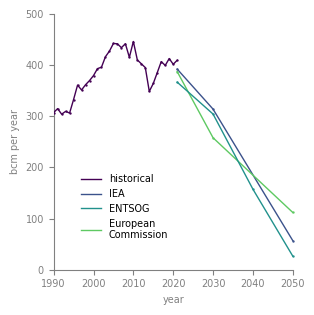

In [49]:
font_size = 7
shade_alpha = 0.333
lw_all = 1
axis_color='0.5'

fig = mp.figure(figsize=(3.25,3.25))

ax = fig.add_subplot(111)

ax.plot(fig2_data_df.loc[~fig2_data_df['EU-27 historical (EC Pocketbook) [bcm]'].isnull()]['Year'],
        fig2_data_df.loc[~fig2_data_df['EU-27 historical (EC Pocketbook) [bcm]'].isnull()]['EU-27 historical (EC Pocketbook) [bcm]'], 
        zorder=4, c=plot_dkpurple, lw=lw_all, label='historical')

ax.plot(fig2_data_df.loc[~fig2_data_df['IEA WEO 2021 Sustainable Development scenario'].isnull()]['Year'],
        fig2_data_df.loc[~fig2_data_df['IEA WEO 2021 Sustainable Development scenario'].isnull()]['IEA WEO 2021 Sustainable Development scenario'], 
        zorder=1, c=plot_purple, lw=lw_all, label='IEA', clip_on=False)

ax.plot(fig2_data_df.loc[~fig2_data_df['EU-27 ENTSOG (2021) average of low-emissions scenarios'].isnull()]['Year'],
        fig2_data_df.loc[~fig2_data_df['EU-27 ENTSOG (2021) average of low-emissions scenarios'].isnull()]['EU-27 ENTSOG (2021) average of low-emissions scenarios'], 
        zorder=3, c=plot_blue, lw=lw_all, label='ENTSOG', clip_on=False)

ax.plot(fig2_data_df.loc[~fig2_data_df['EU-27 European Commission (2020) average of -55% by 2030 scenarios [bcm]'].isnull()]['Year'],
        fig2_data_df.loc[~fig2_data_df['EU-27 European Commission (2020) average of -55% by 2030 scenarios [bcm]'].isnull()]['EU-27 European Commission (2020) average of -55% by 2030 scenarios [bcm]'], 
        zorder=2, c=plot_green, lw=lw_all, label='European\nCommission', clip_on=False)



ax.scatter(fig2_data_df.loc[~fig2_data_df['EU-27 historical (EC Pocketbook) [bcm]'].isnull()]['Year'],
        fig2_data_df.loc[~fig2_data_df['EU-27 historical (EC Pocketbook) [bcm]'].isnull()]['EU-27 historical (EC Pocketbook) [bcm]'], 
        zorder=4, s=.5, color=plot_dkpurple)

ax.scatter(fig2_data_df.loc[~fig2_data_df['IEA WEO 2021 Sustainable Development scenario'].isnull()]['Year'],
        fig2_data_df.loc[~fig2_data_df['IEA WEO 2021 Sustainable Development scenario'].isnull()]['IEA WEO 2021 Sustainable Development scenario'], 
        zorder=1, s=.5, color=plot_purple, clip_on=False)

ax.scatter(fig2_data_df.loc[~fig2_data_df['EU-27 ENTSOG (2021) average of low-emissions scenarios'].isnull()]['Year'],
        fig2_data_df.loc[~fig2_data_df['EU-27 ENTSOG (2021) average of low-emissions scenarios'].isnull()]['EU-27 ENTSOG (2021) average of low-emissions scenarios'], 
        zorder=3, s=.5, color=plot_blue, clip_on=False)

ax.scatter(fig2_data_df.loc[~fig2_data_df['EU-27 European Commission (2020) average of -55% by 2030 scenarios [bcm]'].isnull()]['Year'],
        fig2_data_df.loc[~fig2_data_df['EU-27 European Commission (2020) average of -55% by 2030 scenarios [bcm]'].isnull()]['EU-27 European Commission (2020) average of -55% by 2030 scenarios [bcm]'], 
        zorder=2, s=.5, color=plot_green, clip_on=False)


ax.set_clip_on(False)
ax.tick_params(labelsize=font_size)
ax.set_xlim(1990,2050)
ax.set_ylim(0,500)

ax.set_ylabel('bcm per year', fontsize=font_size, color=axis_color)
ax.set_xlabel('year', fontsize=font_size, color=axis_color)

fig.tight_layout()

ax.legend(fontsize=font_size, frameon=False, 
          bbox_to_anchor=(0.1,0.1), loc='lower left',
          labelspacing=0.5, borderaxespad=0)

ax.spines['bottom'].set_color(axis_color)
ax.spines['left'].set_color(axis_color)
ax.tick_params(colors=axis_color)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

#fig.savefig('Euro-Gas-Report-figure2.pdf', bbox_inches='tight', transparent=True)
#fig.savefig('Euro-Gas-Report-figure2.png', bbox_inches='tight', dpi=600)

# figure 1

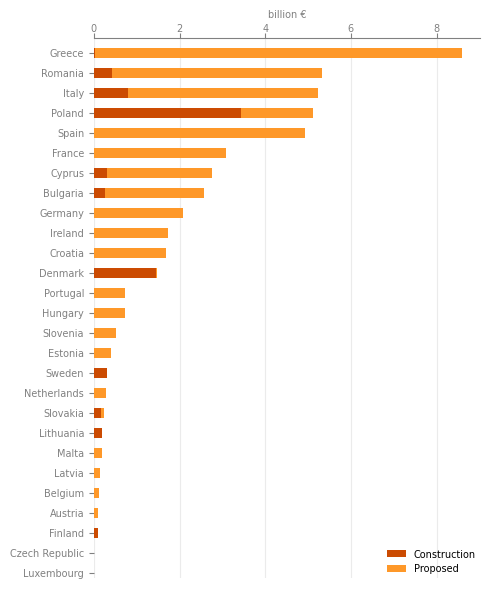

In [50]:
cmap_to_sample = matplotlib.cm.get_cmap('YlOrBr')
bar_orange = cmap_to_sample(0.75)
bar_yellow = cmap_to_sample(0.5)

font_size = 7
axis_color='0.5'

fig = mp.figure(figsize=(5,6))

ax = fig.add_subplot(111)

nbars=27

ax.barh(numpy.arange(nbars), 
        fig1_data_df['Cost of under construction (million €)'].values[::-1]/1e3, 
        facecolor=bar_orange, 
        label='Construction', height=0.5)

ax.barh(numpy.arange(nbars),
        fig1_data_df['Cost of proposed (million €)'].values[::-1]/1e3, 
        left=fig1_data_df['Cost of under construction (million €)'].values[::-1]/1e3, 
        facecolor=bar_yellow, 
        label='Proposed', height=0.5)

ax.set_yticks(numpy.arange(nbars))
ax.set_yticklabels(fig1_data_df.Country[::-1])
ax.tick_params(labelsize=font_size)
ax.tick_params('x', pad=0)
#ax.set_xlim(0,60000)
#ax.set_ylim(-.75,19.75)
ax.set_ylim(-.25,26.75)
ax.set_xlabel('billion €', size=font_size, color=axis_color)
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')

ax.legend(fontsize=font_size, frameon=False, loc='lower right', borderaxespad=0)

ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.spines['top'].set_color(axis_color)
ax.spines['left'].set_color(axis_color)
ax.tick_params(colors=axis_color)

ax.xaxis.grid([2,4,6,8], alpha=0.25)
ax.set_axisbelow(True)

fig.tight_layout()
#fig.savefig('Euro-Gas-Report-figure1.pdf', bbox_inches='tight', transparent=True)
#fig.savefig('Euro-Gas-Report-figure1.png', bbox_inches='tight', dpi=600)

# create figure for cover

In [51]:
#nat_earth_gdf = geopandas.read_file('/Users/baird/Dropbox/_shapefiles/_natural_earth_data/'
#                                        +'ne_10m_admin_0_countries/ne_10m_admin_0_countries.shp')
nat_earth_gdf = geopandas.read_file('/Users/baird/Dropbox/_gis-data/_natural_earth_data/'
                                        +'ne_50m_admin_0_countries/ne_50m_admin_0_countries.shp')
#nat_earth_gdf = geopandas.read_file('/Users/baird/Dropbox/_shapefiles/_natural_earth_data/'
#                                        +'ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp')

In [52]:
nat_earth_gdf.loc[nat_earth_gdf.ADMIN=='Czechia', 'ADMIN'] = 'Czech Republic'

In [89]:
credentials_directory = '/Users/baird/Dropbox/_google-api/'
gc = pygsheets.authorize(service_account_env_var='GDRIVE_API_CREDENTIALS')
spreadsheet = gc.open_by_key('1foPLE6K-uqFlaYgLPAUxzeXfDO5wOOqE7tibNHeqTek')

gas_pipes = spreadsheet.worksheet('title', 'Gas pipelines').get_as_df(start='A2')
oil_pipes = spreadsheet.worksheet('title', 'Oil/NGL pipelines').get_as_df(start='A2')

if 'WKTFormat' in gas_pipes.columns:
    gas_pipes = gas_pipes.drop('WKTFormat', axis=1) # delete WKTFormat column
    oil_pipes = oil_pipes.drop('WKTFormat', axis=1)

pipes_df_orig = gas_pipes.copy()
# remove empty cells for pipes, owners
pipes_df_orig = pipes_df_orig[pipes_df_orig['PipelineName']!='']
pipes_df_orig = pipes_df_orig.loc[pipes_df_orig.Fuel=='Gas']

#get other relevant sheets
country_ratios_df = spreadsheet.worksheet('title', 'Country ratios by pipeline').get_as_df()

In [90]:
# https://www.gem.wiki/Poland-Ukraine_Interconnector_Gas_Pipeline
# our country_ratios code calculates this is half in each country, but it's not
country_ratios_df.loc[(country_ratios_df.PipelineName=='Poland-Ukraine Interconnector Gas Pipeline')&
                      (country_ratios_df.Country=='Poland'),'LengthKnownKmByCountry'] = 1.5

country_ratios_df.loc[(country_ratios_df.PipelineName=='Poland-Ukraine Interconnector Gas Pipeline')&
                      (country_ratios_df.Country=='Ukraine'),'LengthKnownKmByCountry'] = 99.0

In [91]:
def convert_gfit_to_linestring(coord_str, pipeline_name):
    '''
    Takes string from GFIT column of coordinates for a single pipeline,
    converts that string into Shapely LineString or MultiLinestring.
    '''
    #print(coord_str, pipeline_name)
    if ':' in coord_str and ';' not in coord_str:
        # simple geometry; no branching
        # create nested list of lists, separating on colons        
        coord_list = coord_str.split(':')
        coord_list_tuples = []
        # non-branched pipeline (nested list with one level)
        # convert nested list of lists to list of tuples
        try:
            for element in coord_list:
                element_tuple = (float(element.split(',')[1]), 
                                 float(element.split(',')[0]))
                coord_list_tuples.append(element_tuple)
        except:
            print(f"Exception for {pipeline_name}; element: {element}") # for db
        route_conv = shapely.geometry.LineString(coord_list_tuples)

    elif ':' in coord_str and ';' in coord_str:
        # create a nested list of lists, separating on semicolons
        coord_list = coord_str.split(';')   
        # create a second level of nesting, separating on colons
        coord_list = [x.split(':') for x in coord_list]
        # branched pipeline (nested list with two levels)
        route_conv_list_all = []
        
        for nested_list in coord_list:
            coord_list_tuples = []
            # process element
            try:
                for element in nested_list:
                    element_tuple = (float(element.split(',')[1]), 
                                     float(element.split(',')[0]))
                    coord_list_tuples.append(element_tuple)
            except:
                print(f"Exception for {pipeline_name}; element: {element}") # for db
            # process coord_list_tuples
            try:
                route_conv_list = shapely.geometry.LineString(coord_list_tuples)
                route_conv_list_all.append(route_conv_list)
            except:
                print(f"Exception for {pipeline_name}; coord_list_tuples: {coord_list_tuples}") # for db
                pass
            
        route_conv = shapely.geometry.MultiLineString(route_conv_list_all)
        
    return route_conv

In [92]:
def convert_all_pipelines(df):
    """
    Apply the conversion function to all pipelines in the dataframe.
    """
    # create geometry column with empty strings
    #df.assign(ColName='geometry', dtype='str')
    df['geometry'] = ''
    #print(df['geometry'])
    
    # filter to keep only pipelines with routes
    mask_route = df['Route'].str.contains(',' or ':')
    pipes_with_route = df.loc[mask_route]
    
    for row in pipes_with_route.index:
        route_str = df.at[row, 'Route']
        pipeline_name = df.at[row, 'PipelineName']
        
        route_str_converted = convert_gfit_to_linestring(route_str, pipeline_name)
    
        #print(df.at[row,'ProjectID'])
        #print(pipeline_name)
        #print(route_str_converted)
        
        df.at[row, 'geometry'] = route_str_converted   
        
    return df

In [93]:
# code to create a dataframe with WKT formatted geometry
no_route_options = [
    'Unavailable', 
    'Capacity expansion only', 
    'Bidirectionality upgrade only',
    'Short route (< 100 km)', 
    'N/A',
    ''
]

# (1) copy, clean up
to_convert_df = pipes_df_orig.copy()
to_convert_df = to_convert_df[~to_convert_df['Route'].isin(no_route_options)]

# also keep the non-converted ones separate
not_converted_df = pipes_df_orig.copy()
not_converted_df = not_converted_df[not_converted_df['Route'].isin(no_route_options)]
# add a dummy column so that the dimensions match with converted wkt pipelines
not_converted_df.assign(ColName='geometry')
not_converted_df['geometry'] = [shapely.geometry.MultiLineString()]*not_converted_df.shape[0]
not_converted_df.reset_index(drop=True)
not_converted_gdf = geopandas.GeoDataFrame(not_converted_df, geometry=not_converted_df['geometry'])

# (2) convert all pipelines
pipes_df_wkt = convert_all_pipelines(to_convert_df)
pipes_df_wkt = pipes_df_wkt.reset_index(drop=True)

# (3) store in a GeoDataFrame, attach a projection, transform to a different one
pipes_df_wkt_gdf = geopandas.GeoDataFrame(pipes_df_wkt, geometry=pipes_df_wkt['geometry'])
pipes_df_wkt_gdf = pipes_df_wkt_gdf.set_crs('epsg:4326')
pipes_df_wkt_gdf_4087 = pipes_df_wkt_gdf.to_crs('epsg:4087')

In [94]:
pipes_df_converted_routes = pandas.concat([pipes_df_wkt_gdf, not_converted_gdf])
pipes_df_converted_routes = pipes_df_converted_routes.reset_index(drop=True)
pipes_df_converted_routes.sort_values('ProjectID', inplace=True)

/Users/baird/mambaforge/envs/gem/lib/python3.11/site-packages/geopandas/array.py:1406: UserWarning: CRS not set for some of the concatenation inputs. Setting output's CRS as WGS 84 (the single non-null crs provided).
  warnings.warn(


In [95]:
pipes_gdf = geopandas.GeoDataFrame(pipes_df_converted_routes, geometry=pipes_df_converted_routes['geometry'])

In [96]:
credentials_directory = '/Users/baird/Dropbox/_google-api/'
gc = pygsheets.authorize(service_account_env_var='GDRIVE_API_CREDENTIALS')
spreadsheet = gc.open_by_key('1tcS6Wd-Wp-LTDpLzFgJY_RSNDnbyubW3J_9HKIAys4A')
#spreadsheet = gc.open_by_key('1rO5W44FImxlCnrJHRIN954ySqr891Pqa9Up2LowMRWo') # feb 11 2022 version for EGT

#spreadsheet[1] "Gas Pipelines" tab is the second index
#terms_df_orig = spreadsheet[1].get_as_df(encoding='latin1')

terms_df_orig = spreadsheet.worksheet('title', 'Terminals').get_as_df(start='A2')

/Users/baird/mambaforge/envs/gem/lib/python3.11/site-packages/pygsheets/worksheet.py:1554: UserWarning: At least one column name in the data frame is an empty string. If this is a concern, please specify include_tailing_empty=False and/or ensure that each column containing data has a name.
  warnings.warn('At least one column name in the data frame is an empty string. If this is a concern, please specify include_tailing_empty=False and/or ensure that each column containing data has a name.')


In [97]:
# replace all -- with nans
terms_df_orig.replace('--', numpy.nan, inplace=True)
# remove oil export terminals
terms_df_orig = terms_df_orig.loc[terms_df_orig['Fuel']=='Gas']
# remove anything without a wiki page
terms_df_orig = terms_df_orig.loc[terms_df_orig['Wiki']!='']

In [98]:
region_df_orig = spreadsheet.worksheet('title', 'Region dictionary').get_as_df(start='A2')

In [99]:
region_df_eu = region_df_orig.copy()[region_df_orig['EuropeanUnion']=='Yes']
region_df_egt = region_df_orig.copy()[region_df_orig['EuroGasTracker']=='Yes']
region_df_europe = region_df_orig.copy()[region_df_orig['Region']=='Europe']
region_df_touse = region_df_eu.copy()

country_list = region_df_touse.Country

In [100]:
# code to create a dataframe with WKT formatted geometry
no_lonlat_options = [
    'Unknown',
    'TBD'
]

# (1) copy, clean up
to_convert_df = terms_df_orig.copy()
to_convert_df = to_convert_df[~(to_convert_df['Latitude'].isin(no_lonlat_options)) |
                             ~(to_convert_df['Longitude'].isin(no_lonlat_options))]

# also keep the non-converted ones separate
not_converted_df = terms_df_orig.copy()
not_converted_df = not_converted_df[(not_converted_df['Longitude'].isin(no_lonlat_options)) | 
                                    (not_converted_df['Latitude'].isin(no_lonlat_options))]
# add a dummy column so that the dimensions match with converted wkt pipelines
not_converted_df.assign(ColName='geometry')
not_converted_df['geometry'] = [shapely.geometry.Point()]*not_converted_df.shape[0]
not_converted_df.reset_index(drop=True)
not_converted_gdf = geopandas.GeoDataFrame(not_converted_df, geometry=not_converted_df['geometry'])

# (2) convert all terminals
terms_df_converted = to_convert_df.copy()
terms_df_converted.assign(ColName='geometry')
terms_df_converted['geometry'] = to_convert_df[['Longitude','Latitude']].apply(shapely.geometry.Point, axis=1)
terms_df_converted = terms_df_converted.reset_index(drop=True)

# # (3) store in a GeoDataFrame, attach a projection, transform to a different one
terms_df_gdf = geopandas.GeoDataFrame(terms_df_converted, geometry=terms_df_converted['geometry'])
terms_df_gdf = terms_df_gdf.set_crs('epsg:4326')
terms_df_gdf_4087 = terms_df_gdf.to_crs('epsg:4087')

In [101]:
terms_df_converted_locations = pandas.concat([terms_df_gdf, not_converted_gdf])
terms_df_converted_locations = terms_df_converted_locations.reset_index(drop=True)
terms_df_converted_locations.sort_values('ComboID', inplace=True)

/Users/baird/mambaforge/envs/gem/lib/python3.11/site-packages/geopandas/array.py:1406: UserWarning: CRS not set for some of the concatenation inputs. Setting output's CRS as WGS 84 (the single non-null crs provided).
  warnings.warn(


In [102]:
terms_gdf = geopandas.GeoDataFrame(terms_df_converted_locations, geometry=terms_df_converted_locations['geometry'])
terms_gdf_region = terms_gdf.loc[terms_gdf['Country'].isin(region_df_touse.Country)]

/Users/baird/mambaforge/envs/gem/lib/python3.11/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/Users/baird/mambaforge/envs/gem/lib/python3.11/site-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)


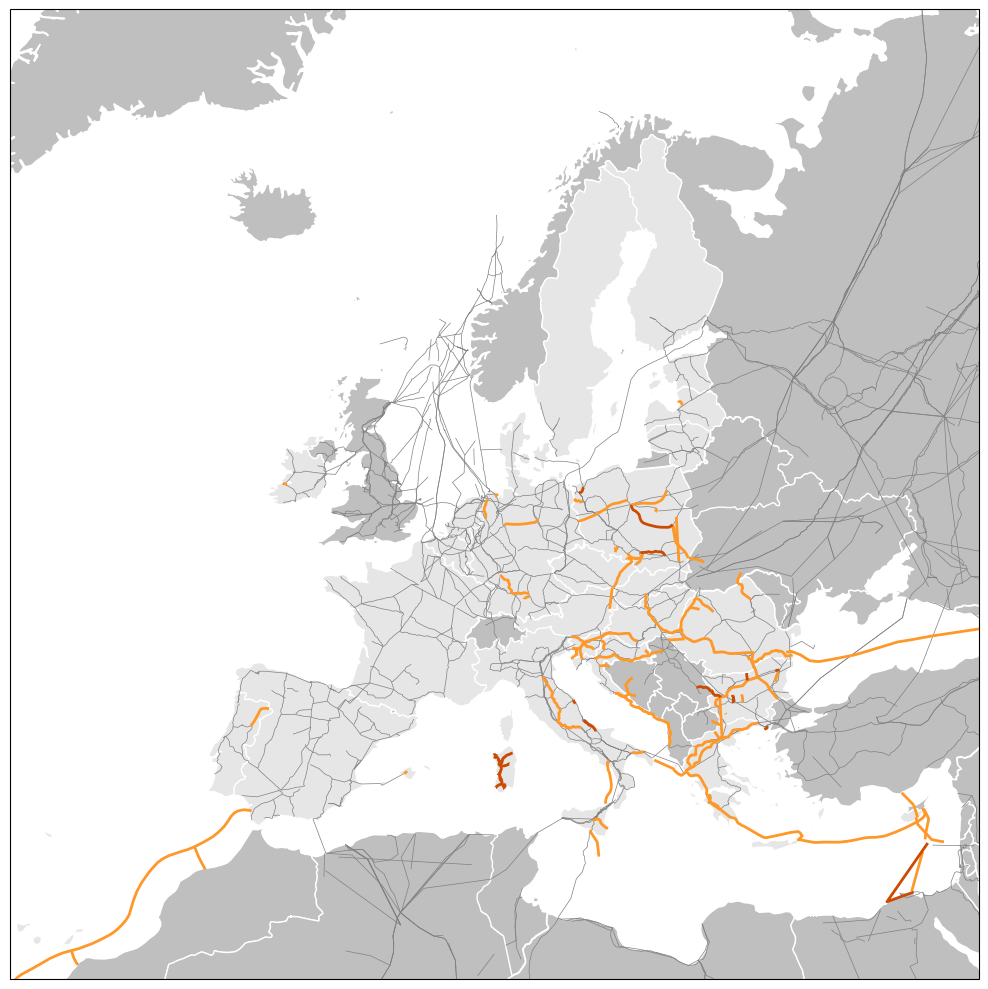

In [103]:
cmap_to_sample = matplotlib.cm.get_cmap('YlOrBr')
bar_dark = cmap_to_sample(0.75)
bar_light = cmap_to_sample(0.5)

operating_color = '0.5'
prop_color = bar_light
const_color = bar_dark

map_proj = cartopy.crs.LambertConformal(central_longitude=10, 
                                        central_latitude=52, 
                                        standard_parallels=(35,65))
data_proj = cartopy.crs.PlateCarree()

fig = mp.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection=map_proj)

for idx,row in nat_earth_gdf.iterrows():
    if row.ADMIN in region_df_touse.Country.tolist():
        ax.add_geometries([row['geometry']], crs=data_proj, facecolor='0.9', edgecolor='1', zorder=1)
    else:
        ax.add_geometries([row['geometry']], crs=data_proj, facecolor='0.75', edgecolor='1', zorder=0)

ax.set_extent([-18,35,30,75], crs=cartopy.crs.PlateCarree())

# operating
ax.add_geometries(pipes_gdf.loc[pipes_gdf.Status.isin(['Operating'])]['geometry'], 
                  crs=data_proj, edgecolor=operating_color, linewidth=0.5, facecolor='None')
# proposed
ax.add_geometries(pipes_gdf.loc[(pipes_gdf.Status.isin(['Proposed']))&
              ((pipes_gdf.StartCountry.isin(region_df_touse.Country))|
               pipes_gdf.EndCountry.isin(region_df_touse.Country))]['geometry'], 
                  crs=data_proj, edgecolor=prop_color, linewidth=2, facecolor='None')
# construction
ax.add_geometries(pipes_gdf.loc[(pipes_gdf.Status.isin(['Construction']))&
              ((pipes_gdf.StartCountry.isin(region_df_touse.Country))|
               pipes_gdf.EndCountry.isin(region_df_touse.Country))]['geometry'], 
                  crs=data_proj, edgecolor=const_color, linewidth=2, facecolor='None')

# regional terms
points = list(terms_gdf_region.loc[terms_gdf.Status.isin(['Operating'])]['geometry'])
ax.scatter([point.x for point in points],
           [point.y for point in points],
           transform=data_proj, zorder=2, s=30, facecolor=operating_color, edgecolor='0.1')

points = list(terms_gdf_region.loc[terms_gdf.Status.isin(['Proposed'])]['geometry'])
ax.scatter([point.x for point in points],
           [point.y for point in points],
           transform=data_proj, zorder=2, s=30, facecolor=prop_color, edgecolor='0.1')

points = list(terms_gdf_region.loc[terms_gdf.Status.isin(['Construction'])]['geometry'])
ax.scatter([point.x for point in points],
           [point.y for point in points],
           transform=data_proj, zorder=2, s=30, facecolor=const_color, edgecolor='0.1', linewidth=0.75)

fig.tight_layout()
fig.savefig('figure-drafts/Euro-Gas-dashboard-map-50m-res.pdf', transparent=False, bbox_inches='tight')
fig.savefig('figure-drafts/Euro-Gas-dashboard-map-50m-res.png', bbox_inches='tight', dpi=600)